## Capstone Project, by Aderus Milan

### I. Data Extraction


#### 1. Download a publicly available dataset.

In [60]:
!pip install pandas
!pip install json
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install statsmodels
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement json
ERROR: No matching distribution found for json


In [90]:
# To import the relevant Python visualization libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
import json
# import seaborn as sns 
# from sklearn.linear_model import LinearRegression 

titanic_data_df = pd.read_excel(r'C:\Users\milan.a\Desktop\titanic_data.xlsx')

# To remove empty row if a value is null
titanic_data_df = titanic_data_df.dropna()
titanic_data_df["Gender"] = gender_binary

gender_binary = pd.Series(np.where(titanic_data_df.Sex.values == 'female', 1, 0),
          titanic_data_df.index)
display(gender_binary)

display(titanic_data_df)

# Alternate read-in
# titanic_data_df = pd.read_excel("~/Desktop/Aderus_Project/titanic_data.xlsx")
# titanic_data_df.head()
# titanic_data_copy = titanic_data_df
# titanic_data_df = titanic_data_df.dropna()

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    0
Length: 183, dtype: int32

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


#### 2.Describe the dataset. 

In [61]:
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
subset_titanic = titanic_data_df
display(subset_titanic)

### II. Data cleanup

#### 3. Write a script/function to clean up the dataset. 

In [94]:
# To clean up any columns that need it. Remove or fill in any missing data.

subset_titanic = titanic_data_df.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
display(subset_titanic)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
1,2,1,1,38.0,1,0,71.2833,1
3,4,1,1,35.0,1,0,53.1000,1
6,7,0,1,54.0,0,0,51.8625,0
10,11,1,3,4.0,1,1,16.7000,1
11,12,1,1,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,1
872,873,0,1,33.0,0,0,5.0000,0
879,880,1,1,56.0,0,1,83.1583,1
887,888,1,1,19.0,0,0,30.0000,1


#### 4. Describe what question you intend to answer with the dataset
 

**THIS DATAFRAME USED REPRESENTS A PARTIAL, YET USEFUL DATA SET.**

BACKGROUND

It is comprised of just 892 lines of data, each representing an individual passenger. It is well-documented that over 1,500 of the 2,223 passengers and 900 employees perished in the disaster. Still, the random data contained herein can illuminate general data trends. 

In the end, the Titanic sinking took the lives of 1,347 men and only 103 women. According to at least one source, 130 first class passengers died, 166 second class passengers died, and 536 third class passengers died. Most of the third class women and children died and most of the first and second class women and children lived. Men accounted for the highest casualty rate aboard the titanic. This is explained by the strict women and children first rule when it came to boarding the lifeboats.

Most of the crew also died during the sinking of the Titanic. There were 899 crew members and 685 of them died during the tragedy. Children also had a high fatality rate, although there weren’t as many on board. 53 Children died which was about half the number of children on board.

**How Many People Died on the Titanic?**<br>

http://www.titanicuniverse.com/how-many-people-died-on-the-titanic/1223#:~:text=In%20the%20end%2C%20the%20Titanic%20sinking%20took%20the,and%20685%20of%20them%20died%20during%20the%20tragedy.

**I seek to isolate comparative demographic ratio data that may be used to develop general trend data. For example...**

* Ratio of males to females (or vice-versa)
* Ratio of children to adults (children defined as 17 or younger
* Ratio of first-class, second-class and third-class pasengers

1) What factors correlated most strongly with survival?<br>
2) Is there any demonstrable trend regarding survival? If so, how might you describe it?<br>
3) Without accounting for error, what initial explanations might be given for any trends and outliers (if they exist)? 


### III. Data visualization

#### 5. Visualize important dimensions of the data

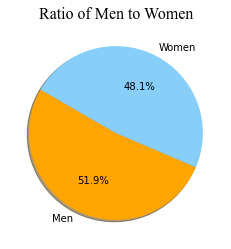

In [85]:
# To create a pie chart displaying the ratio of Men to Women

count_gender = subset_titanic["Gender"].value_counts()

male_slice = count_gender[0]
female_slice = count_gender[1]
gender_names = ["Males", "Females"]
gender_slice = [male_slice, female_slice]

cols = ['orange', 'lightskyblue']
plt.pie(gender_slice, labels=gender_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)
plt.title("Ratio of Males to Females", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

In [ ]:
# To create a bar-chart displaying the survival and death ratios by gender

female_survival_df = subset_titanic[subset_titanic["Gender"] == 1]
count_female_survival = female_survival_df["Survived"].value_counts()

male_survival_df = subset_titanic[subset_titanic["Gender"] == 0]
count_male_survival = male_survival_df["Survived"].value_counts()

male_died_slice = count_male_survival[0]
male_survival_slice = count_male_survival[1]

female_died_slice = count_female_survival[0]
female_survival_slice = count_female_survival[1]

group_names = ["Males Survived", "Males Died", "Females Survived", "Females Died"]
count = [male_died_slice/183, male_survival_slice/183, female_survival_slice/183, female_died_slice/183]

plt.bar(group_names, count)
plt.title('Percent of Survival by Gender Group')
plt.xlabel('Group')
plt.ylabel('Percent Survived')
plt.show()

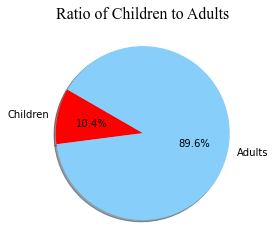

In [38]:
# To create a pie chart displaying the ratio of children to adults 

child_df = subset_titanic[subset_titanic["Age"] <= 17]
child_slice = sum(child_df["Age"].value_counts())

adult_df = subset_titanic[subset_titanic["Age"] > 17]
adult_slice = sum(adult_df["Age"].value_counts())

age_slice = [child_slice, adult_slice]
age_names = ["Children", "Adults"]

cols = ['red', 'lightskyblue']
plt.pie(age_slice, labels=age_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)
plt.title("Ratio of Children to Adults", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

In [91]:
# To display a count of each of three classes: First, Second and Third("Steerage")
# To define classes if needed in another function/program; not needed for this current method to run

first_class = count_classes[1]
second_class = count_classes[2]
third_class = count_classes[3]

count_classes = subset_titanic["Pclass"].value_counts()
print(count_classes)

1    158
2     15
3     10
Name: Pclass, dtype: int64


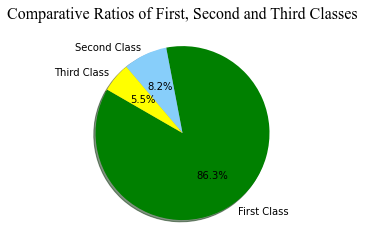

In [68]:
# To use the entire data set to create a pie chart displaying the ratio of classes 1 (First Class), 2 (Second class, and 3 (Third Class/Steerage)

count_classes = titanic_data_copy["Pclass"].value_counts()

print(count_classes)

first_class = count_classes[1]
second_class = count_classes[2]
third_class = count_classes[3]

class_slice = [first_class, second_class, third_class]
class_names = ["First Class", "Second Class", "Third Class"]

cols = ['green', 'lightskyblue', 'yellow']
plt.pie(class_slice, labels=class_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)
plt.title("Comparative Ratios of First, Second and Third Classes", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

In [ ]:
display(count_classes)

In [ ]:
# independent variable = fare
# outcome variable = survived
 
model_subset = subset_titanic[["Survived", "Fare"]].sort_values(by = ["Fare"])   

In [ ]:
every10_df = titanic_data_copy[["Survived", "Fare"]].sort_values(by = ["Fare"])
model_every10_index = every10_df.reset_index(drop = True)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [88]:
# independent var = fare
# outcome var = survived

model_subset = subset_titanic[["Survived", "Fare"]].sort_values(by = ["Fare"])

In [ ]:
every10_df = titanic_data_copy[["Survived", "Fare"]].sort_values(by = ["Fare"])
model_every10_index = every10_df.reset_index(drop = True)

<AxesSubplot:ylabel='Frequency'>

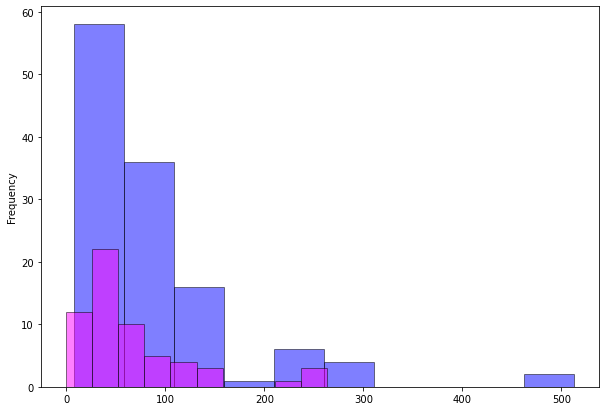

In [75]:
# To create a bar chart showing survival by ticket fare
model_subset[model_subset['Survived'] == 1].Fare.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
model_subset[model_subset['Survived'] == 0].Fare.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
model_subset_index = model_subset.reset_index(drop = True)

In [ ]:
# To iterate through the dataframe and append the percent of people who survived for every $5

def every5():
    
    dicti = {}
    i = 0
    
    lower = 0
    upper = 5
        
    survivedCount = 0
    perishedCount = 0

    # iterate through the rows tuples of dataframe
    for row in model_every10_index.itertuples():
        
        # set bounds for dictionary 
        if row.Fare >= lower and row.Fare < upper:
        
            if row.Survived == 1:
                survivedCount += 1
                
            elif row.Survived == 0:
                perishedCount += 1

       # when fare is above the range(0-0), add the percentage to the dictionary then set new bounds
        elif (survivedCount + perishedCount) != 0:
                            
            dicti[i] = [(survivedCount/(survivedCount + perishedCount)), (lower), (upper)]
        
            i += 1
            lower += 5
            upper += 5
            survivedCount = 0
            perishedCount = 0
              
        # change the bounds of the upper and lower if there is gaps in the data (> 5)
        elif row.Fare < lower or row.Fare >= upper:
            
            i += 1
            
            # create lower bound by rounding down the row fare by 5
            skipLower = row.Fare - (row.Fare % 5)
            lower = skipLower
            # create upper bound
            upper = skipLower + 5
            
            # add to counter for the next iteration through the new bounds.. current iterated row only analyzed.
            # passes new bounds and count to first if statement of function
            if row.Survived == 1:
                survivedCount += 1
                
            elif row.Survived == 0:
                perishedCount += 1 
            
    return dicti

In [ ]:
# To set the dict returned by every10() to a variable
every_5_dollars_dict = every5()
every_5_dollars_dict

In [ ]:
df_rates = pd.DataFrame(list(every_5_dollars_dict.items()), columns = ["Percent", "Bound"])

In [ ]:
df = pd.DataFrame(every_5_dollars_dict)

In [ ]:
df1_transposed = df.T

In [ ]:
X = df1_transposed.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Y = df1_transposed.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

# To create testing set
titanic_y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, titanic_y_pred, color = 'blue', linewidth = 3)
plt.title('Impact of Fare Cost on Percent Chance of Survival')
plt.xlabel('Fare Cost')
plt.ylabel('Percent Survival')

### IV. Descriptive/Predictive analytics
     

7. Draw conclusions from the data. This can based on descriptive statistics and/or visualization, but use of predictive models is preferred and carries a 10-point bonus.

#### Conclusions





8. You may access this project in my Github account at the following address: https://github.com/amilan9246761/NEURepo

If you are interested in reading more on Titanic Data, you can go to these links:

Survivability Study of the 1912 RMS Titanic Disaster
https://www.encyclopedia-titanica.org/survivability-study-of-the-1912-rms-titanic-disaster.html

Predicting Survival on Titanic by Applying Exploratory Data Analytics and Machine Learning Techniques
https://www.researchgate.net/publication/325228831_Predicting_Survival_on_Titanic_by_Applying_Exploratory_Data_Analytics_and_Machine_Learning_Techniques

Kakde, Yogesh & Agrawal, Shefali. (2018). Predicting Survival on Titanic by Applying Exploratory Data Analytics and Machine Learning Techniques. International Journal of Computer Applications. 179. 32-38. 10.5120/ijca2018917094. 